# Módulo 10 tarefa 2

Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Com o que você viu em aula, faça uma análise das variáveis qualitativas (posse de imóvel e posse de veículo) para verificar se são boas preditoras de *renda*. Alguma delas parece discriminar *renda* de forma estatisticamente significante?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Profissão- Cientista de Dados_M10_support material.csv')

In [3]:
df.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


### coloquei em dummie para ver se melhorava a correlação, porém não mudou.

In [57]:
df_qual = df[['posse_de_imovel', 'posse_de_veiculo', 'renda']].copy()
df_qual[['posse_de_imovel', 'posse_de_veiculo']] =df_qual[['posse_de_imovel', 'posse_de_veiculo']].astype(object)

In [58]:
x3 = pd.get_dummies(df_qual)
display(x3)

,renda,posse_de_imovel_False,posse_de_imovel_True,posse_de_veiculo_False,posse_de_veiculo_True
0,3369.24,0,1,1,0
1,6096.14,0,1,0,1
2,5658.98,0,1,0,1
3,7246.69,1,0,0,1
4,4017.37,1,0,1,0
...,...,...,...,...,...
14995,1193.29,0,1,0,1
14996,2519.18,0,1,0,1
14997,1586.85,0,1,0,1
14998,6975.39,0,1,1,0


In [59]:
xx = x3.corr()
display(xx)

,renda,posse_de_imovel_False,posse_de_imovel_True,posse_de_veiculo_False,posse_de_veiculo_True
renda,1.000000,-0.029827,0.029827,-0.063414,0.063414
posse_de_imovel_False,-0.029827,1.000000,-1.000000,-0.014727,0.014727
posse_de_imovel_True,0.029827,-1.000000,1.000000,0.014727,-0.014727
posse_de_veiculo_False,-0.063414,-0.014727,0.014727,1.000000,-1.000000
posse_de_veiculo_True,0.063414,0.014727,-0.014727,-1.000000,1.000000


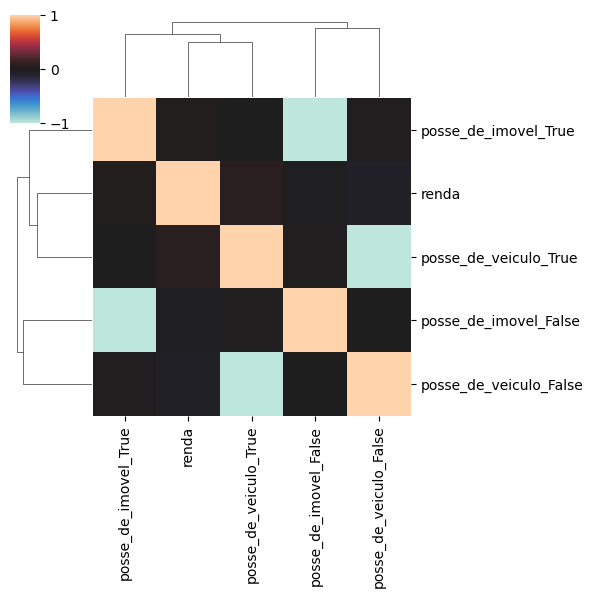

In [60]:
sns.clustermap((xx), figsize=(6, 6), center=0)

## as 2 variáveis não tem uma correlação significativa com a renda